In [1]:
#importing required libraries
import numpy as np
import random as rnd
import itertools as it
import sympy as sym
import time
import matplotlib.pyplot as plt

# One deck of cards shuffled between 2 players

In [2]:
def halfsnap():
    """Calculates number of snaps (face value) in a game with 2 players and half a shuffled deck each"""
    deck = 4*list((x for x in range(1,14))) #create a deck just containing face values
    rnd.shuffle(deck)
    hand1 = deck[:26] #split the deck
    hand2 = deck[26:]
    matches = []
    for x in range(26):
        if hand1[x] == hand2[x]: #each next element in each list simulates the next round
            matches.append(x)
    return len(matches)

In [3]:
def meanhalfsnaps(x):
    """Calculates the mean number of snaps for x trials of halfsnap"""
    trials = [halfsnap() for i in range(x)]
    return np.mean(trials)

In [4]:
meanhalfsnaps(10000)

1.5458000000000001

# A shuffled deck each for 2 players

In [5]:
def doublesnap():
    """Returns the number of snaps playing 1 game of snap for 2 players with a deck of shuffled cards each"""
    tempdeck = list(it.product(range(1,14),['Spades','Hearts','Diamonds','Clubs'])) #use itertools to create product of face values and suits
    deck = []
    for x in range(len(tempdeck)):
        deck.append(str(tempdeck[x][0]) +' of '+ str(tempdeck[x][1])) #create single string elements in deck
    hand1 = [x for x in deck]
    hand2 = [x for x in deck]
    rnd.shuffle(hand1) #shuffle each hand manually
    rnd.shuffle(hand2)
    matches = []
    for x in range(52):
        if hand1[x] == hand2[x]:
            matches.append(x)
    return len(matches)

In [6]:
def meandoublesnaps(x):
    """Calculates the mean number of snaps for x trials of doublesnap"""
    trials = [doublesnap() for i in range(x)]
    return np.mean(trials)

In [7]:
meandoublesnaps(10000)

0.99590000000000001

In [8]:
def doubleprobability(P):
    """Returns the probability of having at least one snap in a game, from P different trials"""
    snaplist = []
    for x in range(P):
        if doublesnap() > 0: #check there's at least 1 snap in the game
            snaplist.append('Snap') #adds a successful round to a list
    return len(snaplist)/P

In [9]:
doubleprobability(100000)

0.6322

# A shuffled deck each for N players

In [10]:
def numbersnap(N):
    """Calculates the number of any snaps in a round playing 1 game of snap for N players with a deck of shuffled cards each"""
    tempdeck = list(it.product(range(1,14),['Spades','Hearts','Diamonds','Clubs']))
    deck = []
    for x in range(len(tempdeck)):
        deck.append(str(tempdeck[x][0]) +' of '+ str(tempdeck[x][1]))
    temphands = []
    for i in range(N):
        temphands.append(deck) #creates N unshuffled decks for N players in a temporary hands list
    hands = []
    for t in temphands: #shuffles each element in temporary hands and adds to a new list of hands
        rnd.shuffle(t)
        hands.append(list(t))
    checklist =  [[[hands[q][k] == hands[p][k] for q in range(len(hands))] for p in range(len(hands))] for k in range(len(hands[0]))]
    Matcheslist = []
    for y in range(len(checklist)):
        Roundmatchlist = []
        for p in range(len(hands)):
            if checklist[y][p].count(True) >= 2: #A card will always match itself, so checking >= 2 ensures it matches to at least one other card
                    Roundmatchlist.append(p)
        if len(Roundmatchlist) != 0: #if theres a match in a round, add to matcheslist
            Matcheslist.append('Match')
    return len(Matcheslist)

In [11]:
def meansnaps(N, x):
    """Calculates mean number of snaps for x trials of N players"""
    trials = [numbersnap(N) for i in range(x)]
    return np.mean(trials)

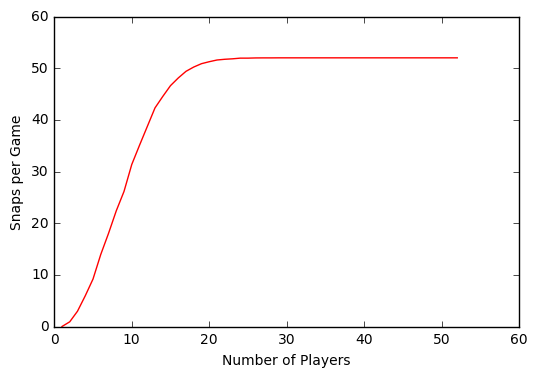

In [12]:
plt.plot([x for x in range(1, 53)], [meansnaps(x, 100) for x in range(1, 53)], 'r-') #use matplotlib.pyplot
plt.xlabel('Number of Players')
plt.ylabel('Snaps per Game')
plt.savefig('SnapGraph.pdf')  
plt.show()  
plt.close()

In [13]:
def approach(z):
    """Function that calculated how many players are needed for expected snaps of a game to be 52"""
    x = 1
    while meansnaps(x, z) != 52:
        meansnaps(x, z)
        x += 1
    return x

In [14]:
def timedapproach(z):
    """Function to time how long it takes to calculate different values for approach(z)"""
    start_time = time.clock() #use time library
    approach(z)
    return int(time.clock() - start_time)

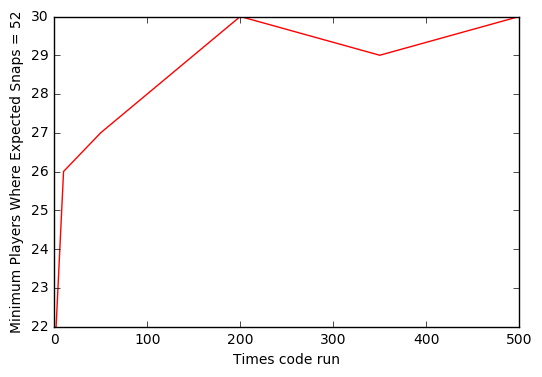

In [15]:
plt.plot([2, 10, 50, 100, 200, 350, 500], [approach(2), approach(10), approach(50), approach(100), approach(350), approach(200), approach(500)], 'r-')
plt.xlabel('Times code run')
plt.ylabel('Minimum Players Where Expected Snaps = 52')
plt.savefig('E(x)Graph.pdf')  
plt.show()  
plt.close()

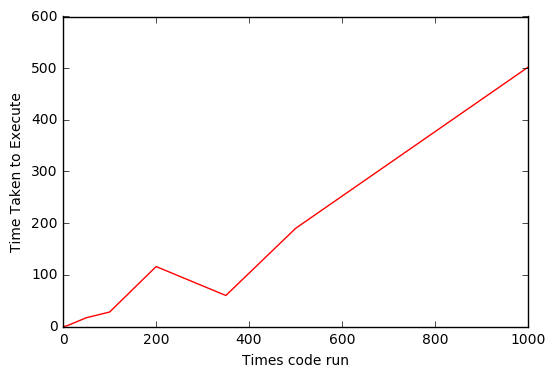

In [16]:
plt.plot([2, 10, 50, 100, 200, 350, 500, 1000], [timedapproach(2), timedapproach(10), timedapproach(50), timedapproach(100), timedapproach(350), timedapproach(200), timedapproach(500), timedapproach(1000) ], 'r-')
plt.xlabel('Times code run')
plt.ylabel('Time Taken to Execute')
plt.savefig('TimeGraph.pdf')  
plt.show()  
plt.close()